In [1]:
from scrape import get_results
from scrape import get_data
from scrape import grab_years_played
from scrape import revised_run
from scrape import train_test
from scrape import read_adps
from scrape import summarize_proj

2022 WR Projections

In [2]:
X_train2022, X_test2022 = train_test('qb', num_years=5, year_for=2022)
xgbPPR_results = revised_run(X_train2022, X_test2022, 'qb', year_for='2022')
xgbPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.8438988594735526
======= Fold 1 ========
Our accuracy on the validation set is 4.804296795476454
======= Fold 2 ========
Our accuracy on the validation set is 3.1516703739964824
======= Fold 3 ========
Our accuracy on the validation set is 5.510828261380904
======= Fold 4 ========
Our accuracy on the validation set is 4.921528174972115
Overall accuracy: 4.446444493059902
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jalen-hurts,25.843298,1,3
1,justin-fields,22.541878,2,6
2,josh-allen-qb,22.225021,3,2
3,lamar-jackson,21.591496,4,13
4,patrick-mahomes,21.455162,5,1
5,joe-burrow,21.001163,6,4
6,daniel-jones,20.939365,7,9
7,trevor-lawrence,20.321973,8,8
8,geno-smith,19.932059,9,5
9,justin-herbert,18.556120,10,11


======= Fold 0 ========
Our accuracy on the validation set is 3.735779816670445
======= Fold 1 ========
Our accuracy on the validation set is 4.615352463969716
======= Fold 2 ========
Our accuracy on the validation set is 3.3749935138632887
======= Fold 3 ========
Our accuracy on the validation set is 5.243471455988645
======= Fold 4 ========
Our accuracy on the validation set is 5.299973470150271
Overall accuracy: 4.453914144128473
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jalen-hurts,24.898015,1,3
1,josh-allen-qb,21.778343,2,2
2,justin-fields,21.455884,3,6
3,patrick-mahomes,21.204391,4,1
4,lamar-jackson,20.896236,5,13
5,joe-burrow,20.387106,6,4
6,daniel-jones,20.246094,7,9
7,trevor-lawrence,19.797032,8,8
8,geno-smith,19.451865,9,5
9,justin-herbert,18.100429,10,11


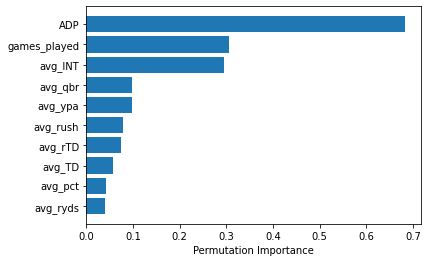

In [3]:
enetPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'enet', pca=False)
enetPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 4.510403357602938
======= Fold 1 ========
Our accuracy on the validation set is 3.9221773245886324
======= Fold 2 ========
Our accuracy on the validation set is 3.6192581767539056
======= Fold 3 ========
Our accuracy on the validation set is 5.826031217733046
======= Fold 4 ========
Our accuracy on the validation set is 4.758348719431383
Overall accuracy: 4.527243759221981
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,justin-fields,23.1336,1,6
1,jalen-hurts,23.0432,2,3
2,patrick-mahomes,22.8390,3,1
3,trevor-lawrence,22.8038,4,8
4,lamar-jackson,22.5166,5,13
5,josh-allen-qb,21.8228,6,2
6,deshaun-watson,20.4280,7,30
7,joe-burrow,19.9536,8,4
8,justin-herbert,19.8328,9,11
9,tua-tagovailoa,18.8530,10,14


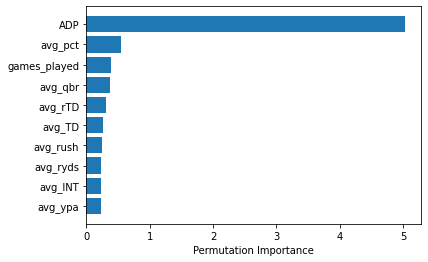

In [4]:
rfPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'rf', pca=False)
rfPPR_results.head(50)

In [5]:
svrPPR_results = revised_run(X_train2022, X_test2022, 'qb', model_ = 'svr')
svrPPR_results.head(50)

======= Fold 0 ========
Our accuracy on the validation set is 3.5551758081537295
======= Fold 1 ========
Our accuracy on the validation set is 4.794105811749841
======= Fold 2 ========
Our accuracy on the validation set is 3.724001026544628
======= Fold 3 ========
Our accuracy on the validation set is 5.330126331178929
======= Fold 4 ========
Our accuracy on the validation set is 5.229464141591834
Overall accuracy: 4.526574623843792
iteration 1: Dimensions = (38, 2)
iteration 2: Dimensions = (76, 2)
iteration 3: Dimensions = (114, 2)
iteration 4: Dimensions = (152, 2)
iteration 5: Dimensions = (190, 2)
Index(['name', 'proj fpts', 'rank'], dtype='object')


,name,proj fpts,rank,last rank
0,jalen-hurts,26.366466,1,3
1,justin-fields,22.510777,2,6
2,josh-allen-qb,21.863012,3,2
3,lamar-jackson,21.346471,4,13
4,patrick-mahomes,21.062465,5,1
5,joe-burrow,21.052165,6,4
6,daniel-jones,20.678493,7,9
7,trevor-lawrence,20.079794,8,8
8,geno-smith,19.095263,9,5
9,justin-herbert,18.493362,10,11


In [6]:
mean_results_PPR = xgbPPR_results.append([rfPPR_results, svrPPR_results, enetPPR_results], ignore_index = True)[['name', 'proj fpts']].groupby('name', as_index=False).mean().sort_values('proj fpts', ascending=False)
mean_results_PPR = mean_results_PPR.reset_index(drop=True)
mean_results_PPR['rank'] = mean_results_PPR.index + 1
mean_results_PPR.to_csv('projections/qb_PPR_2022_mean_projections.csv', index = False)
mean_results_PPR.head(50)

,name,proj fpts,rank
0,jalen-hurts,25.037745,1
1,justin-fields,22.410535,2
2,josh-allen-qb,21.922294,3
3,patrick-mahomes,21.640254,4
4,lamar-jackson,21.587701,5
5,trevor-lawrence,20.750650,6
6,joe-burrow,20.598508,7
7,daniel-jones,20.012088,8
8,geno-smith,18.994947,9
9,justin-herbert,18.745678,10


In [7]:
summarize_proj('qb', '2022', 'PPR')

,name,rf proj,xgb proj,enet proj,svr proj,mean proj,rank,last rank
1,jalen-hurts,23.0432,25.843298,24.898015,26.366466,25.037745,1,3
0,justin-fields,23.1336,22.541878,21.455884,22.510777,22.410535,2,6
5,josh-allen-qb,21.8228,22.225021,21.778343,21.863012,21.922294,3,2
2,patrick-mahomes,22.8390,21.455162,21.204391,21.062465,21.640254,4,1
4,lamar-jackson,22.5166,21.591496,20.896236,21.346471,21.587701,5,13
3,trevor-lawrence,22.8038,20.321973,19.797032,20.079794,20.750650,6,8
7,joe-burrow,19.9536,21.001163,20.387106,21.052165,20.598508,7,4
11,daniel-jones,18.1844,20.939365,20.246094,20.678493,20.012088,8,9
12,geno-smith,17.5006,19.932059,19.451865,19.095263,18.994947,9,5
8,justin-herbert,19.8328,18.556120,18.100429,18.493362,18.745678,10,11
